In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import SRRS
from SRRS import plotting

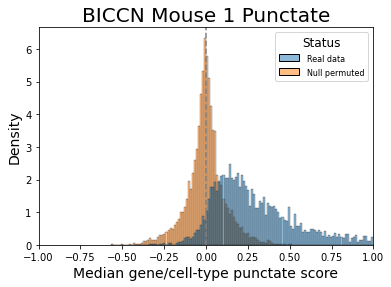

In [28]:
real_punctate = pd.read_csv(
    '../../nf_pipeline/outputs/BICCN_20220601_direct/gene_ont/BICCN_mouse1_punctate_gene_ont.csv',
)
real_punctate['Status'] = 'Real data'

sim_punctate = pd.read_csv(
    '../../nf_pipeline/outputs/SRRS_20220531_permuted/gene_ont/BICCN_mouse1_punctate_gene_ont.csv',
)
sim_punctate['Status'] = 'Null permuted'

df = pd.concat((real_punctate,sim_punctate),ignore_index=True)

fig = plt.figure()

ax = sns.histplot(
    x = 'med_score',
    hue = 'Status',
    stat = 'density',
    common_norm = False,
    data = df,
)
plt.axvline(0,linestyle='dashed',color='grey')
plt.xlim(-1,1)
plt.xlabel('Median gene/cell-type punctate score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.setp(ax.get_legend().get_texts(), fontsize='8') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='12') # for legend title
plt.title('BICCN Mouse 1 Punctate', fontsize=20)
plt.savefig('punctate_overclustering_real_data.svg')
plt.show(fig)
plt.close()

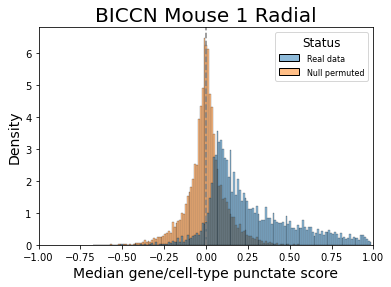

In [7]:
real_radial = pd.read_csv(
    '../../nf_pipeline/outputs/BICCN_20220601_direct/gene_ont/BICCN_mouse1_radial_gene_ont.csv',
)
real_radial['Status'] = 'Real data'

sim_radial = pd.read_csv(
    '../../nf_pipeline/outputs/SRRS_20220531_permuted/gene_ont/BICCN_mouse1_radial_gene_ont.csv',
)
sim_radial['Status'] = 'Null permuted'

df = pd.concat((real_punctate,sim_punctate),ignore_index=True)

fig = plt.figure()

ax = sns.histplot(
    x = 'med_score',
    hue = 'Status',
    stat = 'density',
    common_norm = False,
    data = df,
)
plt.axvline(0,linestyle='dashed',color='grey')
plt.xlim(-1,1)
plt.xlabel('Median gene/cell-type punctate score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.setp(ax.get_legend().get_texts(), fontsize='8') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='12') # for legend title
plt.title('BICCN Mouse 1 Radial', fontsize=20)
plt.savefig('radial_overclustering_real_data.svg')
plt.show(fig)
plt.close()

# Example cells from highly radial gene/cell-types

In [8]:
real_radial[
    real_radial['med_score'].between(0.5, 0.75)
].sort_values('med_score')

,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p,Status
762,BICCN_mouse1,m1s1,radial,Cldn5,SMC,1183,19.0,338.0,0.500,20.831208,0.000000e+00,0.000000e+00,Real data
1365,BICCN_mouse1,m1s1,radial,Gpc6,Oligo,111,2.0,325.0,0.500,6.108222,1.007472e-09,3.034915e-09,Real data
3463,BICCN_mouse1,m1s1,radial,Ubash3b,L6b,67,2.0,671.0,0.500,3.501926,4.619071e-04,7.653620e-04,Real data
1647,BICCN_mouse1,m1s1,radial,Lama3,Sst,86,2.0,692.5,0.501,4.737029,2.168743e-06,4.687574e-06,Real data
1922,BICCN_mouse1,m1s1,radial,Npas1,L5_ET,63,2.0,820.0,0.502,5.212816,1.859954e-07,4.540182e-07,Real data
...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,BICCN_mouse1,m1s1,radial,Ctss,L56_NP,160,3.0,512.5,0.749,9.913455,0.000000e+00,0.000000e+00,Real data
1434,BICCN_mouse1,m1s1,radial,Grm8,SMC,22,2.0,398.0,0.749,3.683893,2.296988e-04,3.940477e-04,Real data
2117,BICCN_mouse1,m1s1,radial,Opalin,SMC,23,3.0,389.0,0.750,2.507539,1.215753e-02,1.692573e-02,Real data
2151,BICCN_mouse1,m1s1,radial,Otof,Vip,49,2.0,512.0,0.750,5.814374,6.086116e-09,1.705049e-08,Real data


In [14]:
radial_cells = pd.read_csv(
    '../../nf_pipeline/outputs/BICCN_20220601_direct/gene_cell/BICCN_mouse1_radial_gene_cell.csv',
)

radial_cells[
    radial_cells['annotation'].eq('Oligo')
    & radial_cells['gene'].eq('Gpc6')
    & radial_cells['score'].between(0.5,0.75)
].sort_values('sample')

,metric,cell_id,annotation,num_spots,gene,num_gene_spots,score,variance,experiment,sample
1707006,radial,74383517792804764652623188652103781101,Oligo,450,Gpc6,2,0.672,0.334,BICCN_mouse1,m1s2
3047007,radial,172051073029248252272410158330072382719,Oligo,288,Gpc6,4,0.600,0.334,BICCN_mouse1,m1s4
3478541,radial,314952203298215137196848883675332466265,Oligo,384,Gpc6,3,0.708,0.334,BICCN_mouse1,m1s4
3554909,radial,91639538180505727740365430696182493265,Oligo,194,Gpc6,2,0.558,0.334,BICCN_mouse1,m1s4
3623600,radial,20695402777173810790742536454746209624,Oligo,312,Gpc6,4,0.500,0.334,BICCN_mouse1,m1s4
3792170,radial,222415046107478907318102925600775369864,Oligo,301,Gpc6,3,0.624,0.334,BICCN_mouse1,m1s4
3818022,radial,88441326035558449362439724427792601849,Oligo,895,Gpc6,5,0.616,0.334,BICCN_mouse1,m1s4
2140931,radial,48731457073828804695796222308031591704,Oligo,320,Gpc6,2,0.570,0.334,BICCN_mouse1,m1s5
2421678,radial,128911285515630273243564946503230063882,Oligo,1109,Gpc6,2,0.652,0.334,BICCN_mouse1,m1s5
2446322,radial,206141617132291113821632842914896879330,Oligo,804,Gpc6,3,0.654,0.334,BICCN_mouse1,m1s5


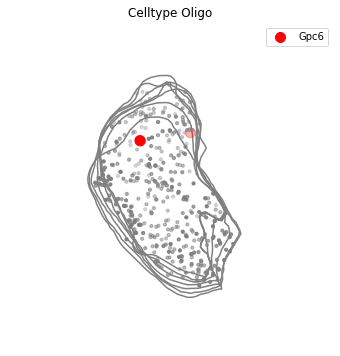

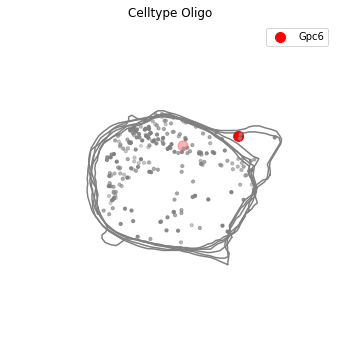

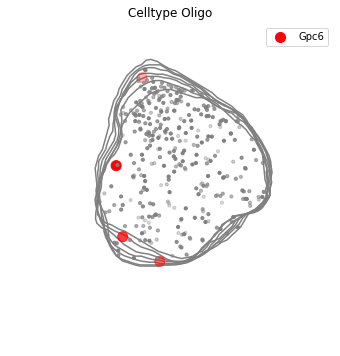

In [25]:
sample = SRRS.HDF5('../../inputs/hdf5s/BICCN_mouse1sample4.hdf5')
cells = sample.get_cells_by_id([
    '314952203298215137196848883675332466265',
    '91639538180505727740365430696182493265',
    '20695402777173810790742536454746209624'
])

for i,cell in enumerate(cells):
    fig,ax = plotting.plot_cell_3D(cell, gene_colors={'Gpc6':'red'})
    ax.view_init(elev=90)
    plt.savefig(f'radial_punctate_example_cells/radial_gpc6_oligo_{i+1}.svg')
    plt.show(fig)
    plt.close()

# Example cells from highly punctate gene/cell-types

In [30]:
real_punctate[
    real_punctate['med_score'].between(0.5, 0.75)
].sort_values('med_score')

,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p,Status
3600,BICCN_mouse1,m1s1,puncta,Wipf3,OPC,320,3.0,293.5,0.500,8.527339,0.000000e+00,0.000000e+00,Real data
3267,BICCN_mouse1,m1s1,puncta,Thsd7a,Endo,29,2.0,221.0,0.502,3.450897,5.587259e-04,8.855003e-04,Real data
653,BICCN_mouse1,m1s1,puncta,Cdh9,Oligo,85,2.0,309.0,0.502,5.084618,3.683658e-07,8.421771e-07,Real data
546,BICCN_mouse1,m1s1,puncta,Cd24a,Astro,56,3.5,251.0,0.502,4.332211,1.476192e-05,2.800151e-05,Real data
1205,BICCN_mouse1,m1s1,puncta,Fbxl7,VLMC,316,2.0,367.5,0.502,9.260560,0.000000e+00,0.000000e+00,Real data
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,BICCN_mouse1,m1s1,puncta,Wipf3,SMC,111,2.0,412.0,0.744,7.367575,1.738609e-13,6.441521e-13,Real data
125,BICCN_mouse1,m1s2,puncta,Ano4,Astro,84,3.0,250.5,0.748,7.007639,2.423839e-12,8.242410e-12,Real data
1638,BICCN_mouse1,m1s1,puncta,Lama3,L5_IT,102,2.0,676.5,0.749,8.449179,0.000000e+00,0.000000e+00,Real data
3547,BICCN_mouse1,m1s1,puncta,Vipr2,L5_IT,27,2.0,680.0,0.750,3.487181,4.881405e-04,7.790568e-04,Real data


In [33]:
punctate_cells = pd.read_csv(
    '../../nf_pipeline/outputs/BICCN_20220601_direct/gene_cell/BICCN_mouse1_punctate_gene_cell.csv',
)

punctate_cells[
    punctate_cells['annotation'].eq('OPC')
    & punctate_cells['gene'].eq('Wipf3')
    & punctate_cells['score'].between(0.5,0.75)
    & punctate_cells['num_gene_spots'].gt(2)
].sort_values('sample')

,metric,cell_id,annotation,num_spots,gene,num_gene_spots,score,variance,experiment,sample
663985,puncta,200424335501771967308741307745303420976,OPC,428,Wipf3,3,0.552,0.334,BICCN_mouse1,m1s2
701509,puncta,325662329535158384069983822389705634735,OPC,485,Wipf3,5,0.544,0.334,BICCN_mouse1,m1s2
922486,puncta,118356546141312138899957192082711859688,OPC,278,Wipf3,3,0.622,0.334,BICCN_mouse1,m1s2
1313784,puncta,211423867016467265128365186099103833460,OPC,192,Wipf3,6,0.644,0.334,BICCN_mouse1,m1s3
1656303,puncta,182967942844240605063706670937427438464,OPC,351,Wipf3,3,0.570,0.334,BICCN_mouse1,m1s3
1692076,puncta,153978205056300430005825614060820909887,OPC,263,Wipf3,4,0.546,0.334,BICCN_mouse1,m1s3
1833427,puncta,213094590330000493489888105541954328754,OPC,201,Wipf3,4,0.516,0.334,BICCN_mouse1,m1s4
2086686,puncta,294948515250075294070012568170107856037,OPC,179,Wipf3,3,0.718,0.334,BICCN_mouse1,m1s4
3620084,puncta,339976143130768969079842221658114528009,OPC,382,Wipf3,3,0.572,0.334,BICCN_mouse1,m1s5
3612726,puncta,16839474773296052652939510602500723526,OPC,179,Wipf3,5,0.722,0.334,BICCN_mouse1,m1s5


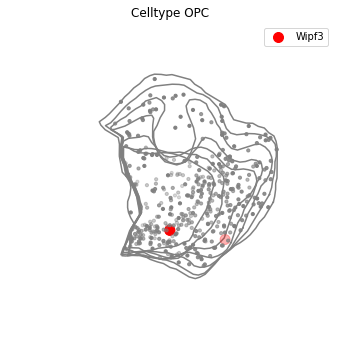

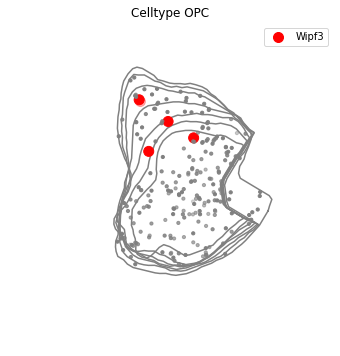

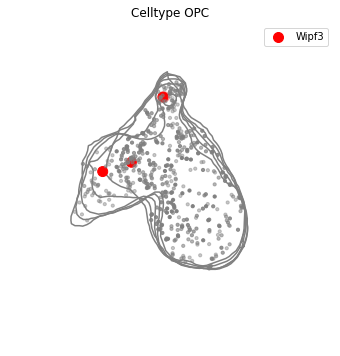

In [35]:
sample = SRRS.HDF5('../../inputs/hdf5s/BICCN_mouse1sample5.hdf5')
cells = sample.get_cells_by_id([
    '339976143130768969079842221658114528009',
    '16839474773296052652939510602500723526',
    '337278934992276781839204767404210983101'
])

for i,cell in enumerate(cells):
    fig,ax = plotting.plot_cell_3D(cell, gene_colors={'Wipf3':'red'})
    ax.view_init(elev=90)
    plt.savefig(f'radial_punctate_example_cells/punctate_Wipf3_OPC_{i+1}.svg')
    plt.show(fig)
    plt.close()